<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Отлично, Камиль! Ты здорово поработал над комментариями и теперь твой проект принят.
    
Спасибо за работу и успехов в следующих проектах!)

<div style="border:solid green 2px; padding: 20px">
<b>Привет!</b>

Меня зовут Михаленко Дмитрий, и я буду проверять твой проект. Предлагаю общаться на «ты» :) Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - **пожалуйста, не перемещай, не изменяй и не удаляй их**. Увидев у тебя ошибку, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой начальник будет поступать так же, а я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Так выделены небольшие замечания. Я надеюсь, что их ты тоже учтешь - твой проект от этого станет только лучше. Но настаивать на их отработке не буду.

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом.** Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Объёмная и творческая аналитическая задача, тем интереснее будет с ней справиться! </div>

### Откройте файл с данными и изучите общую информацию. 

#### 1. Импортирем библиотеки. Считываем данные из csv-файла в датафрейм и сохраняем в переменную `df`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep = '\t')

#### 2. Изучаем общую информацию о полученном датафрейме.

In [2]:
#Выведем первые 15 сток
df.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
#Выведем основную информацию о датафрейме с помощью метода info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### 3. Построим общую гистограмму для всех числовых столбцов таблицы.

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

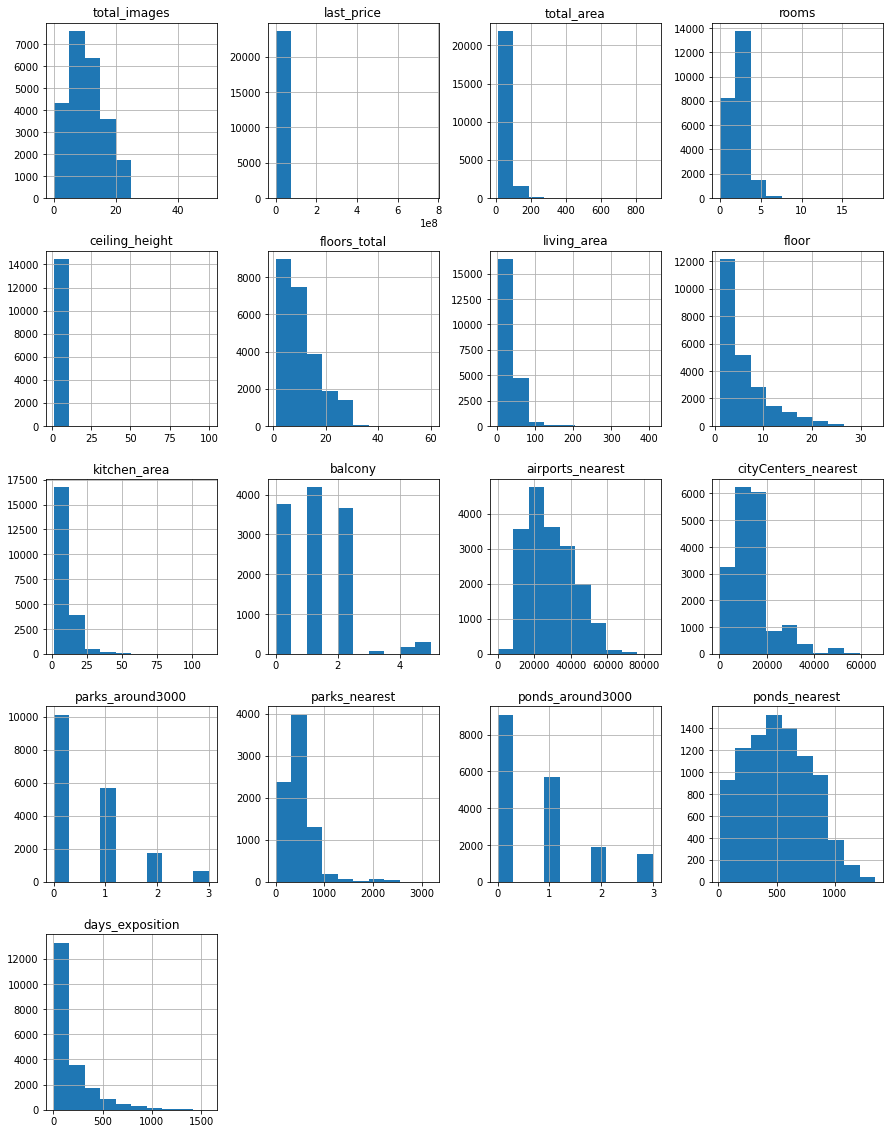

In [4]:
df.hist(figsize=(15, 20))

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Хорошее начало, так держать. </div>

### Предобработка данных

#### 1.Найдем и изучим пропущенные значения в столбцах:

In [5]:
#Выведем количество пропущенных значений для каждого столбца.
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Заполним пропущенные значения там, где это возможно.**

In [6]:
#Пропущенные значения в ceiling_height можем заполнить медианой. Для начала проверим значения методом describe()
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [7]:
#В данных имеются выбросы. Значение 2.65 считаю приемлемой для заполнения пропусков
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Воспользуемся медианой </div>

In [8]:
#Пропуски в floors_total заменим соответствующим значением в floor 
df.loc[df["floors_total"].isna(), "floors_total"] = df.loc[df["floors_total"].isna(), "floor"]

In [9]:
#На значения в living_area скорее всего влияет количество комнат rooms, проверим корреляцию:
df['living_area'].corr(df['rooms'])

0.8459774567888749

In [10]:
#Заполним пропуски в этом столбце медианным значением по каждому типу из столбца 'rooms'
for t in df['rooms'].unique():
    df.loc[(df['rooms'] == t) & (df['living_area'].isna()), 'living_area'] = \
    df.loc[(df['rooms'] == t), 'living_area'].median()
#проверим пропуски
df['living_area'].isna().sum()

0

In [11]:
#Пропуски в is_apartment заполним значением False, так как люди игнорировали этот пункт, потому что у них некоммерческая недвижимость.
df['is_apartment'] = df['is_apartment'].fillna('False')

In [12]:
#kitchen_area заполним пропуски в этом столбце медианным значением по каждому типу из столбца total_area
for t in df['total_area'].unique():
    df.loc[(df['total_area'] == t) & (df['kitchen_area'].isna()), 'kitchen_area'] = \
    df.loc[(df['total_area'] == t), 'kitchen_area'].median()
#проверим пропуски
df['kitchen_area'].isna().sum()

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

205

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Абсолютно логичные решения по заполнению данных </div>

In [13]:
#удалим строки с незаполненными значениями
df = df.loc[df['kitchen_area'].notnull()]

In [14]:
#пропуски в balcony заполним 0, так как люди не указали пункт в этом значении, потому что у них его нет.
df['balcony'] = df['balcony'].fillna(0)

In [15]:
#Строки с пропусками в locality_name можем удалить, их всего 49
df = df.loc[df['locality_name'].notnull()]

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Отбросим их </div>

In [16]:
#airports_nearest заполним медианой медиан по группировке locality_name
t = df.pivot_table(index = 'locality_name', values = 'airports_nearest', aggfunc = 'median')
df['airports_nearest'] = df['airports_nearest'].fillna(t['airports_nearest'].median())

In [17]:
#аналогично заполним cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest.
t = df.pivot_table(index = 'locality_name', values = 'cityCenters_nearest', aggfunc = 'median')
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(t['cityCenters_nearest'].median())

t = df.pivot_table(index = 'locality_name', values = 'parks_around3000', aggfunc = 'median')
df['parks_around3000'] = df['parks_around3000'].fillna(t['parks_around3000'].median())

t = df.pivot_table(index = 'locality_name', values = 'parks_nearest', aggfunc = 'median')
df['parks_nearest'] = df['parks_nearest'].fillna(t['parks_nearest'].median())

t = df.pivot_table(index = 'locality_name', values = 'ponds_around3000', aggfunc = 'median')
df['ponds_around3000'] = df['ponds_around3000'].fillna(t['ponds_around3000'].median())

t = df.pivot_table(index = 'locality_name', values = 'ponds_nearest', aggfunc = 'median')
df['ponds_nearest'] = df['ponds_nearest'].fillna(t['ponds_nearest'].median())

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Тут используем медиану </div>

In [18]:
#days_exposition заполним медианой медиан от даты размещения обЪявления
t = df.pivot_table(index = 'first_day_exposition', values = 'days_exposition', aggfunc = 'median')
df['days_exposition'] = df['days_exposition'].fillna(t['days_exposition'].median())
df['days_exposition'].isna().sum()

0

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Еще в days_exposition неплохо было бы посмотреть на пропуски по годам, вдруг так можно увидеть какую-то закономерность

<div class="alert alert-info"> Постарался исправить. Надеюсь правильно понял. Может, конечно, ты имел в виду, что нужно переместить снизу вверх изменение типа данных столбца first_day_exposition в формат datetime и столбец 'year' и по не ним уже заполнить пропуски? </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Интересны способ заполнения) На самом деле я имел в виду как раз второй вариант, можно также было просто провести такую проверку наоборот ниже по проекту)

In [19]:
#Проверим пропуски
df.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

*Пропуски здесь могут возникать как из-за технической проблемы, так и из-за человеческого фактора. Например, если какие-то поля были не обязательными для заполнения.*

#### 2. Рассмотрим типы данных в каждом столбце:

In [20]:
#выведем информацию о df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23445 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23445 non-null  int64  
 1   last_price            23445 non-null  float64
 2   total_area            23445 non-null  float64
 3   first_day_exposition  23445 non-null  object 
 4   rooms                 23445 non-null  int64  
 5   ceiling_height        23445 non-null  float64
 6   floors_total          23445 non-null  float64
 7   living_area           23445 non-null  float64
 8   floor                 23445 non-null  int64  
 9   is_apartment          23445 non-null  object 
 10  studio                23445 non-null  bool   
 11  open_plan             23445 non-null  bool   
 12  kitchen_area          23445 non-null  float64
 13  balcony               23445 non-null  float64
 14  locality_name         23445 non-null  object 
 15  airports_nearest   

In [21]:
#first_day_exposition переведем в формат DateTime
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d %H:%M:%S')

In [22]:
#floors_total, balcony, parks_around3000, ponds_around3000, days_exposition переведем в формат integer
df['floors_total'] = df['floors_total'].astype(int)
df['balcony'] = df['balcony'].astype(int)
df['parks_around3000'] = df['parks_around3000'].astype(int)
df['ponds_around3000'] = df['ponds_around3000'].astype(int)
df['days_exposition'] = df['days_exposition'].astype(int)

In [23]:
#is_apartment переведем в формат bool
df['is_apartment'] = df['is_apartment'].astype(bool)

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Эти типы данных подрйдут им лучше

In [24]:
#Проверим
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23445 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23445 non-null  int64         
 1   last_price            23445 non-null  float64       
 2   total_area            23445 non-null  float64       
 3   first_day_exposition  23445 non-null  datetime64[ns]
 4   rooms                 23445 non-null  int64         
 5   ceiling_height        23445 non-null  float64       
 6   floors_total          23445 non-null  int64         
 7   living_area           23445 non-null  float64       
 8   floor                 23445 non-null  int64         
 9   is_apartment          23445 non-null  bool          
 10  studio                23445 non-null  bool          
 11  open_plan             23445 non-null  bool          
 12  kitchen_area          23445 non-null  float64       
 13  balcony         

*День публикации мы изменили в формат datetime для того чтобы можно было добавить столбцы день недели, месяц, год.*

*Количество этажей в доме, количество балконов, количество парков, количество водоемов, количество дней публикации перевели в формат int, так как это целочисленные объекты.*

*Апартаменты изменили в булев тип, так как изначальный тип был неверен.*


#### 3. Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты.

In [25]:
#посмотрим уникальные значения
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [26]:
#поменяем ё на е
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')

In [27]:
#поменяем городской поселок на поселок городского типа
df['locality_name'] = df['locality_name'].str.replace('городской поселок', 'поселок городского типа')

In [76]:
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Молодец, что детально обработал неявные дубликаты

#### 4. Найдем и устраним редкие и выбивающиеся значения.

In [28]:
#посмотрим уникальные значения
df['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

In [29]:
# в ceiling_height есть искажения: это высота более 10м.
for t in df['ceiling_height'].unique():
    df.loc[(df['ceiling_height'] == t) & (df['ceiling_height'] > 10), 'ceiling_height'] = t * 0.1

In [30]:
# удалим выбивающиеся значения ceiling_height. Будем считать, что значения меньше 2м и больше 4м метров выбивающиеся.
df = df.query('2 < ceiling_height < 4')

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> И границы потолков тоже вывраны отлично

In [31]:
#составим описательную статистику
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23340.000000,2.334000e+04,23340.000000,23340.000000,23340.000000,23340.000000,23340.000000,23340.000000,23340.000000,23340.000000,23340.000000,23340.000000,23340.000000,23340.000000,23340.000000,23340.000000,23340.000000
mean,9.878578,6.455882e+06,60.084659,2.072237,2.691203,10.665167,34.187270,5.883033,10.428514,0.593702,31243.136504,17485.464010,0.467395,427.925985,0.819152,509.584319,176.950814
std,5.671514,1.060828e+07,34.295210,1.067181,0.197505,6.579601,21.101049,4.874010,5.719321,0.960822,11920.163488,9579.631905,0.746392,204.673008,0.825792,172.033570,204.592779
min,0.000000,1.219000e+04,14.000000,0.000000,2.200000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.450000e+06,40.000000,1.000000,2.600000,5.000000,18.500000,2.000000,7.000000,0.000000,21109.000000,10977.000000,0.000000,395.500000,0.000000,504.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.400000,4.000000,9.000000,0.000000,33564.000000,14996.000000,0.000000,395.500000,1.000000,504.000000,124.000000
75%,14.000000,6.750000e+06,69.600000,3.000000,2.700000,16.000000,42.600000,8.000000,11.800000,1.000000,39231.000000,28246.000000,1.000000,395.500000,1.000000,504.000000,198.000000
max,50.000000,7.630000e+08,900.000000,19.000000,3.980000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7f6704d05e80>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6704c96580>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6704d05b20>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6704c96c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6704c96fa0>],
 'means': []}

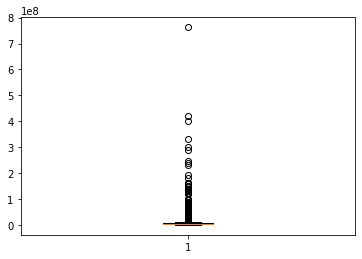

In [32]:
#проверим 'last_price' подробнее
plt.boxplot(df['last_price'])

In [33]:
#цену больше 150 млн будем считать выбросами
df = df.query('1e+5 < last_price < 150e+6')
#total_area больше 200кв и living_area больше 170кв исключим
df = df.query('total_area < 200')
df = df.query('living_area < 170')
#rooms больше 5 исключаем
df = df.query('rooms <= 5')
#balcony больше 2 исключаем
df = df.query('balcony <= 2')
#в остальных стольбцах по гистограммам более правдаподобные распределения.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> И ограничения по остальным столбцам тоже смотрятся обоснованно

*в данных имееются выбросы, но их немного. Есть такие интересные явления, как 3 балкона, или 6 комнат.*

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> В разделе "Предобработка данных" было проведено так много анализа и работы, все же стоит написать по нему хотя бы короткий вывод

**На этапе предобратки данных:** 

Были выявлены пропуски, которые удалось заполнить по схожим типам в других столбцах по их медианными значениями. Некоторые данные заполнялись исходя из логических рассуждений;

Были рассмотренны и изменены типы данных** в некоторых столбцах;

Были изучены уникальные значения в столбце с названиями и устранены неявные дубликаты;

Также были найдены анамалии в данных, от которых мы избавились в основном срезами.

<div class="alert alert-info"> Постарался сделать короткую выжимку</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Так раздел стал еще целостнее

### Посчитайте и добавьте в таблицу новые столбцы

In [34]:
#добавим столбец 'square_metr_price' с ценой за 1кв м
df['square_metr_price'] = df['last_price'] / df['total_area']

In [35]:
#добавим столбец 'day_of_week', в котором день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
df['day_of_week'] = pd.DatetimeIndex(df['first_day_exposition']).dayofweek

In [36]:
#добавим столбец 'month', в котором день месяц публикации объявления
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month

In [37]:
#добавим столбец 'year', в котором год публикации объявления
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year

In [38]:
#добавим столбец 'type_floor', в котором тип этажа квартиры (значения — «первый», «последний», «другой»)
for _ in df['floor']:
  df.loc[df['floor'] == 1, 'type_floor'] = 'первый'

for t in df['floor']:
  df.loc[(df['floor'] == t) & (df['floors_total'] == t), 'type_floor'] = 'последний'

df['type_floor'] = df['type_floor'].fillna('другой')

In [39]:
#добавим столбец 'distance_to_centr_km', в котором расстояние до центра города в километрах (округленные до целых)
df['distance_to_centr_km'] = df['cityCenters_nearest'] / 1000
df['distance_to_centr_km'] = df['distance_to_centr_km'].astype(int)

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Великолепно, все пункты задания выполнены в полном объёме

### Проведите исследовательский анализ данных

#### 1. Изучим следующие параметры объектов:

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Хорошо одну за одной строишь гистограммы по необходимым параметрам

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Могу посоветовать посмотреть данные материалы, чтобы научиться оформлять графики еще лучше:

[Здесь](https://pyprog.pro/mpl/mpl_title.html)
  
[И здесь](https://pyprog.pro/mpl/mpl_axis_signatures.html)
    
[И вот тут](https://www.python-graph-gallery.com)
    
   

<div class="alert alert-info"> Большое спасибо за методические материалы, поизучаю на досуге! :)</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Рад помочь)

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

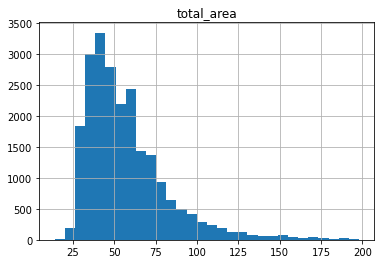

In [40]:
df.hist('total_area', bins = 30)

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

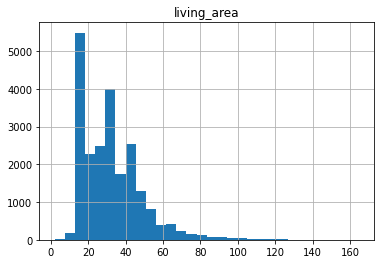

In [41]:
df.hist('living_area', bins = 30)

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

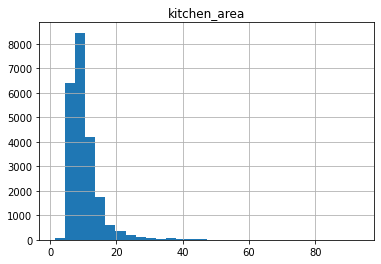

In [42]:
df.hist('kitchen_area', bins = 30)

<AxesSubplot:ylabel='Frequency'>

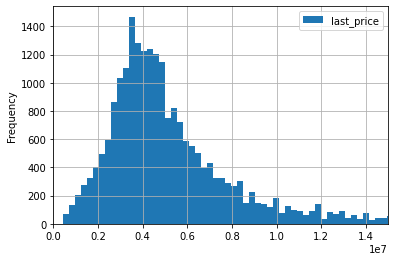

In [43]:
df.plot(y = 'last_price', kind = 'hist', bins = 500, xlim = (0, 15e+6), grid = True)

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

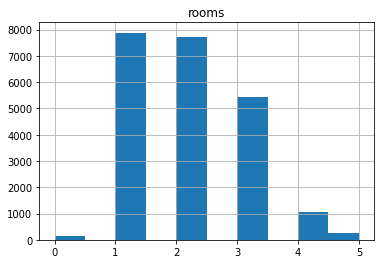

In [44]:
df.hist('rooms')

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

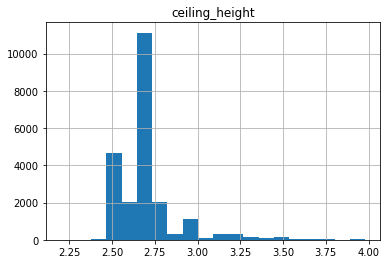

In [45]:
df.hist('ceiling_height', bins = 20)

array([[<AxesSubplot:title={'center':'floor'}>]], dtype=object)

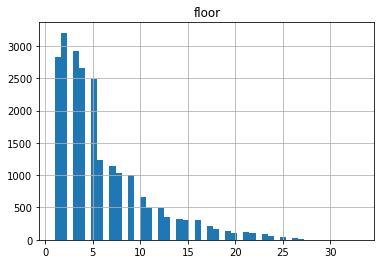

In [46]:
df.hist('floor', bins = 50)

<AxesSubplot:>

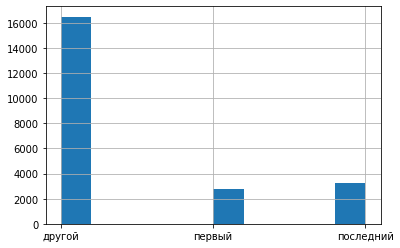

In [47]:
df['type_floor'].hist()

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

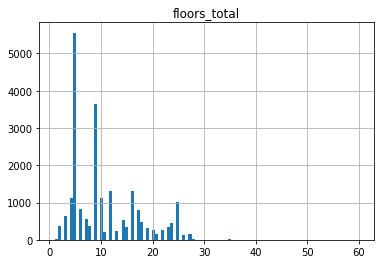

In [48]:
df.hist('floors_total', bins = 100)

array([[<AxesSubplot:title={'center':'cityCenters_nearest'}>]],
      dtype=object)

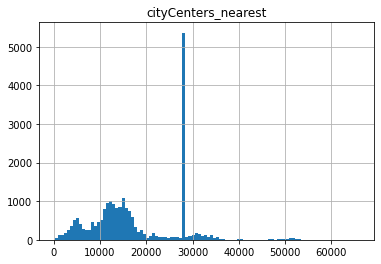

In [49]:
df.hist('cityCenters_nearest', bins = 100)

array([[<AxesSubplot:title={'center':'airports_nearest'}>]], dtype=object)

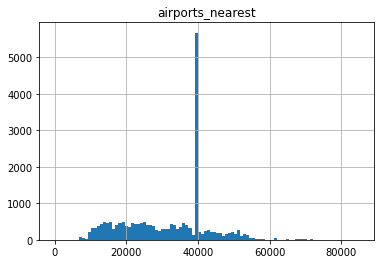

In [50]:
df.hist('airports_nearest', bins = 100)

array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

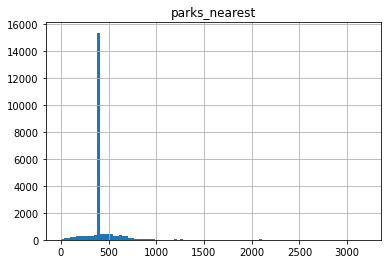

In [51]:
df.hist('parks_nearest', bins = 100)

array([[<AxesSubplot:title={'center':'day_of_week'}>]], dtype=object)

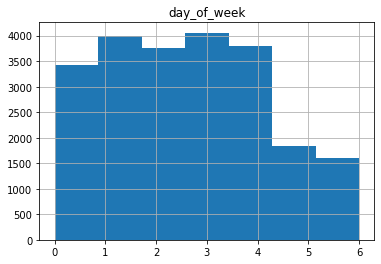

In [52]:
df.hist('day_of_week', bins = 7)

array([[<AxesSubplot:title={'center':'month'}>]], dtype=object)

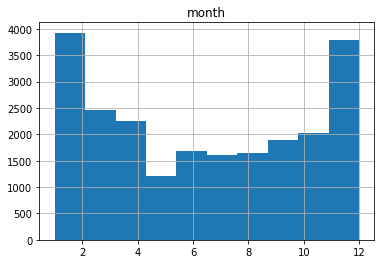

In [53]:
df.hist('month')

**общая площадь:** *большинство квартир на продажу с квадратурой около 30 - 40 кв.м;*

**жилая площадь:** *большинство квартир имеют жилую площадь около 14 - 18 кв.м;*

**площадь кухни:** *большинство квартир имеют площадь кухни около 11 кв.м;*

**цена объекта:** *у большинство квартир последняя цена варьируется от 3.5 до 4,5 млн.руб;*

**количество комнат:** *большинство квартир на продажу - однокомнатные и двухкомнатные;*

**высота потолков:** *в большинстве домов высота потолков около 2,6 м;*

**этаж квартиры:** *большинство квартир продают на 2 и 3 этаже;*

**тип этажа квартиры («первый», «последний», «другой»):** *реже продают квартиры на первых и последних этажах;*

**общее количество этажей в доме:** *в основном продают квартиры в пятиэтажных домах, на втором месте 9 этажные дома;*

**расстояние до центра города в метрах:** *в большинстве объявлениях о продаже квартир расстояние от цента города около 27км;*

**расстояние до ближайшего аэропорта:** *в большинстве объявлениях о продаже квартир расстояние от аэропорта 40км;*

**расстояние до ближайшего парка:** *в большинстве объявлениях о продаже квартир расстояние до ближайшего парка 400м;*

**день и месяц публикации объявления:** *1)меньше всего объявлений выставляют в субботу и воскресенье, скорее всего этим занимаются в основном риэлторы;*

*2)большинство объявлений выставляют в конце и в начале года(декабрь - январь), скорее всего потому, что в это время вырастают цены на квартиры.*


<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> И описание по графикам добавил блестяще, все по пунктам!

#### 2. Изучим, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.

**Построим гистограмму.**

<AxesSubplot:ylabel='Frequency'>

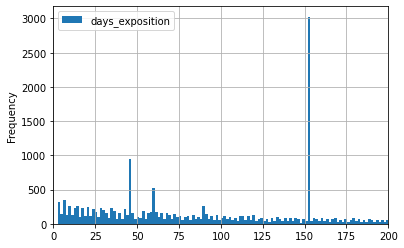

In [54]:
df.plot(y = 'days_exposition', kind = 'hist', bins = 1000, xlim = (0, 200), grid = True)

**Посчитаем среднее и медиану.**

In [55]:
df['days_exposition'].mean()

175.9023468752778

In [56]:
df['days_exposition'].median()

122.0

*В основном квартиры продались по истечению 150 дней(5 месяцев) со дня публикации. На втором метсе по количеству проданных квартир - около 40 дней со дня публикации. Есть и быстрые продажи - в первые недели со сдня публикации, есть и очень долгие - больше года со дня публикации.*

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Отлично установил границы days_exposition

<div class="alert alert-info"> Из-за заполнения пропусков другим методом, значение среднего и медианы поменялись. Вывод переписал:)</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Молодец, что заметил)

#### 3. Какие факторы больше всего влияют на общую (полную) стоимость объекта?
**Изучим, зависит ли цена от:**

общей площади;

жилой площади;

площади кухни;

количества комнат;

этажа, на котором расположена квартира (первый, последний, другой);

даты размещения (день недели, месяц, год).

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

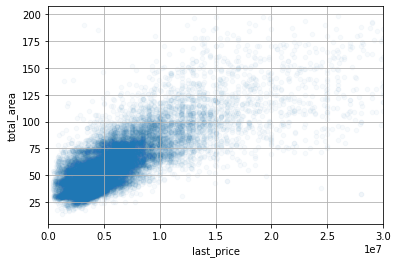

In [57]:
df.plot(x = 'last_price', y = 'total_area', kind = 'scatter', grid = True, xlim = (0, 3e+7), alpha=0.03)

In [58]:
df['last_price'].corr(df['total_area'])

0.7148104752166294

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Здорово, что анализируешь как линейную, так и нелинейную зависимость

<AxesSubplot:xlabel='last_price', ylabel='living_area'>

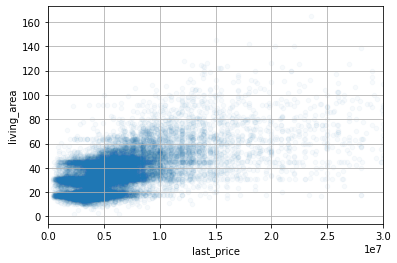

In [59]:
df.plot(x = 'last_price', y = 'living_area', kind = 'scatter', grid = True, xlim = (0, 3e+7), alpha=0.03)

In [60]:
df['last_price'].corr(df['living_area'])

0.5707039227080485

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> И диаграмма рассеяния наиболее подходящий график для анализа зависимости

<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>

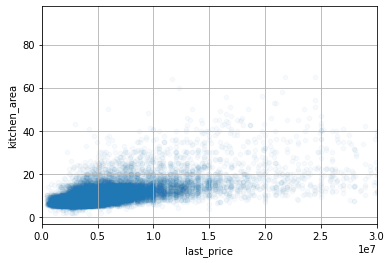

In [61]:
df.plot(x = 'last_price', y = 'kitchen_area', kind = 'scatter', grid = True, xlim = (0, 3e+7), alpha=0.03)

In [62]:
df['last_price'].corr(df['kitchen_area'])

0.569100666369303

<AxesSubplot:xlabel='rooms'>

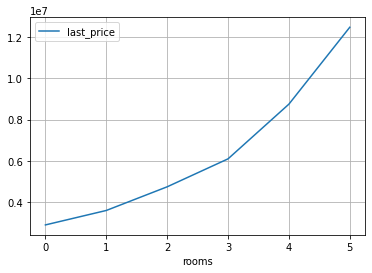

In [63]:
df.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'median').plot(y = 'last_price', grid = True)

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> А вот тут и далее диаграмма рассеяния не подойдет, она покажет только частотность распределения и не укажет напрямую на зависимость параметров. Для комнат и всех следующих параметров стоит построить линейные графики по средним или медианам

<div class="alert alert-info"> Большое спасибо за наводку, я долго сидел над этими графиками и ничего не понимал(так и думал, что здесь будет ошибка). Теперь все намного понятнее :)</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Супер! Действительно стало гораздо нагляднее

In [64]:
df.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['median', 'mean', 'count'])

,median,mean,count
,last_price,last_price,last_price
rooms,,,
0,2900000.0,3.114300e+06,140
1,3600000.0,3.830441e+06,7881
2,4746000.0,5.501892e+06,7711
3,6100000.0,7.883646e+06,5453
4,8750000.0,1.155879e+07,1065
5,12475000.0,1.481656e+07,248


<AxesSubplot:xlabel='type_floor'>

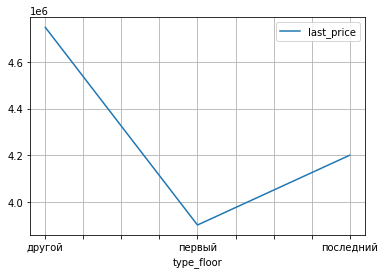

In [65]:
df.pivot_table(index = 'type_floor', values = 'last_price', aggfunc = 'median').plot(y = 'last_price', grid = True)

In [66]:
df.pivot_table(index = 'type_floor', values = 'last_price', aggfunc = ['median', 'mean', 'count'])

,median,mean,count
,last_price,last_price,last_price
type_floor,,,
другой,4750000.0,6.148485e+06,16482
первый,3900000.0,4.578333e+06,2796
последний,4200000.0,5.553601e+06,3220


<AxesSubplot:xlabel='day_of_week'>

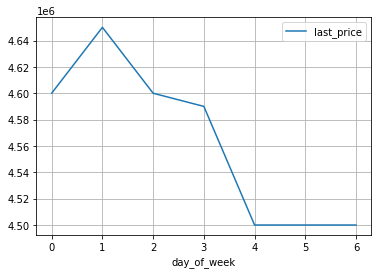

In [67]:
df.pivot_table(index = 'day_of_week', values = 'last_price', aggfunc = 'median').plot(y = 'last_price', grid = True)

In [68]:
df.pivot_table(index = 'day_of_week', values = 'last_price', aggfunc = ['median', 'mean', 'count'])

,median,mean,count
,last_price,last_price,last_price
day_of_week,,,
0,4600000.0,5.941741e+06,3432
1,4650000.0,5.893028e+06,3992
2,4600000.0,5.837942e+06,3766
3,4590000.0,6.086765e+06,4057
4,4500000.0,5.744339e+06,3800
5,4500000.0,5.689655e+06,1843
6,4500000.0,5.666482e+06,1608


<AxesSubplot:xlabel='month'>

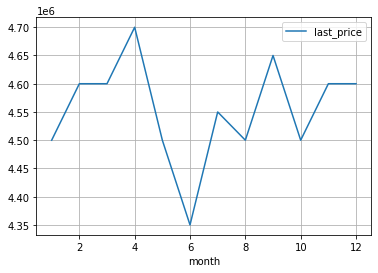

In [69]:
df.pivot_table(index = 'month', values = 'last_price', aggfunc = 'median').plot(y = 'last_price', grid = True)

In [70]:
df.pivot_table(index = 'month', values = 'last_price', aggfunc = ['median', 'mean', 'count'])

,median,mean,count
,last_price,last_price,last_price
month,,,
1,4500000.0,5.845253e+06,1410
2,4600000.0,5.937984e+06,2517
3,4600000.0,5.757169e+06,2466
4,4700000.0,5.898090e+06,2256
5,4500000.0,5.895271e+06,1217
6,4350000.0,5.775661e+06,1681
7,4550000.0,5.817778e+06,1601
8,4500000.0,5.866397e+06,1651


<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> И корреляиция Пирсона также не совсем применима к временным показателям, ведь это фактически категорийные данные, а корреляция применима только для непрерывных числовых)

<div class="alert alert-info"> Хотел найти хоть какую-нибудь зависимость(выкручивался как мог :D ). Еще многому нужно научиться :)  Сделал сводные таблицы(нужно было сделать это раньше). Спасибо за подсказки!) </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Все отлично)

<AxesSubplot:xlabel='year'>

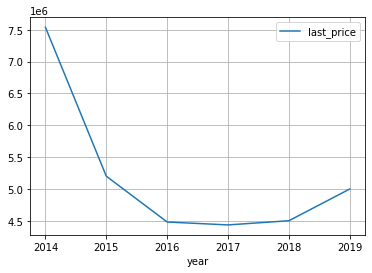

In [71]:
df.pivot_table(index = 'year', values = 'last_price', aggfunc = 'median').plot(y = 'last_price', grid = True)

In [72]:
df.pivot_table(index = 'year', values = 'last_price', aggfunc = ['median', 'mean', 'count'])

,median,mean,count
,last_price,last_price,last_price
year,,,
2014,7540000.0,1.105071e+07,126
2015,5200000.0,7.257519e+06,1110
2016,4480000.0,6.003348e+06,2652
2017,4434242.0,5.744650e+06,7776
2018,4500000.0,5.548619e+06,8097
2019,4999000.0,6.231737e+06,2737


*от общей площади зависит цена квартиры. Коэффициент Пирсона здесь аж 0.74*

*от жилой площади зависит цена квартиры. Коэффициент Пирсона здесь 0.54*

*от площади кухни зависит цена квартиры. Коэффициент Пирсона здесь аж 0.57*

*от количества комнат зависит цена квартиры. Линейный график показывает, что стоимость квартиры напрямую зависит от количества комнат*

*от типа этажа зависит цена квартиры. На линейном графике виден резкий спад в цене на квартиры на первом этаже. Так же видно что цены на квартиры на последнем этаже тоже ниже, чем цены на тип этажа "другие".*

*Линейный график показал что от дня недели публикации тоже зависит цена квартиры. Цены на квартиры, опубликованных в выходные дни, на медианные 150тыс рублей ниже, чем опубликованных в будни*

*Зависимость цены от месяца публикации тоже есть. Виден спад цен в летнее время года, начиная с мая по август.*

*График показывает , что с 2014 года идёт спад цен на квартиры. В 2017 году достигнут минимум цены на квартиры, далее идёт плавный подъём цены.*


<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> После исправления графиков поправь пожалуйста выводы)

<div class="alert alert-info"> Исправил!)</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Верно!

#### 4. Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [73]:
df_pop_city_price = df.pivot_table(index = 'locality_name', values = 'square_metr_price', aggfunc = ['min', 'max', 'mean', 'count'])
df_pop_city_price.columns = ['min_square_metr_price', 'max_square_metr_price', 'mean_square_metr_price', 'count']
df_pop_city_price = df_pop_city_price.sort_values(by = 'count', ascending = False)
df_pop_city_price.head(10)

,min_square_metr_price,max_square_metr_price,mean_square_metr_price,count
locality_name,,,,
Санкт-Петербург,15345.268542,995983.935743,112827.396660,14872
поселок Мурино,50000.000000,138580.246914,85248.002587,506
поселок Шушары,47700.416089,147826.086957,78880.094751,430
Всеволожск,31400.000000,640422.350472,68697.905760,377
Пушкин,59836.065574,204451.772465,102117.559011,348
поселок Парголово,48405.466970,138522.427441,90332.263023,326
Колпино,47957.371226,118694.362018,75155.197216,325
Гатчина,10507.246377,146315.789474,68695.805246,295
деревня Кудрово,63723.323077,142857.142857,92661.961248,282


<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Ты правильно ответил на вопрос задания!

#### 5. Теперь выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра.

In [74]:
df_spb = df.loc[df['locality_name'] == 'Санкт-Петербург']
piv_df = df_spb.pivot_table(index = 'distance_to_centr_km', values = 'last_price', aggfunc = 'median')
piv_df


,last_price
distance_to_centr_km,
0,10000000.0
1,9900000.0
2,9200000.0
3,8200000.0
4,9400000.0
5,8500000.0
6,7600000.0
7,7300000.0
8,6500000.0


<AxesSubplot:xlabel='distance_to_centr_km'>

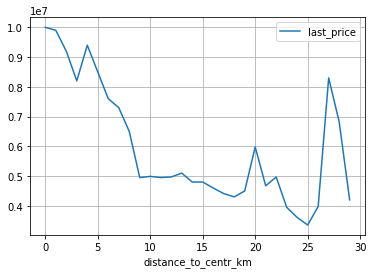

In [75]:
piv_df.plot(y = 'last_price', grid = True)

*Стоимость объектов снижается в зависимости от отдаления от цента, хотя есть и скачки, возможно это цены на престижные новостройки.*

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Средние цены по километрам также посчитаны и визуализированы безупречно

### Общий вывод

**В этом проекте были предоставлены данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.** Из них были данные о:

— расстояние до ближайшего аэропорта в метрах (м)
— число балконов
— высота потолков (м)
— расстояние до центра города (м)
— сколько дней было размещено объявление (от публикации до снятия)
— дата публикации
— этаж
— всего этажей в доме
— апартаменты (булев тип)
— площадь кухни в квадратных метрах (м²)
— цена на момент снятия с публикации
— жилая площадь в квадратных метрах (м²)
— название населённого пункта
— свободная планировка (булев тип)
— число парков в радиусе 3 км
— расстояние до ближайшего парка (м)
— число водоёмов в радиусе 3 км
— расстояние до ближайшего водоёма (м)
— число комнат
— квартира-студия (булев тип)
— общая площадь квартиры в квадратных метрах (м²)
— число фотографий квартиры в объявлении

**На этапе предобратки данных** были выявлены пропуски в высоте потолков, этажности дома, жилой площади, апартаментах(булев тип), площади кухни, количестве балконов, названии населенного пункта, расстоянии до аэропорта, расстоянии до центра города, расстоянии до ближайшего парка, расстоянии до ближайшего водоема, количестве водоемов в радиусе 3км, количестве парков в радиусе 3км, количестве дней сколько размещена публикация. 

Пропуски в высоте потолков билы заполнены медианным значением;

Пропуски в этажности дома были заполнены этажом самой квартиры;

Пропуски в жилой площади заполнены медианными значениями по каждому типу из количества комнат;

Пропуски в апартаментах(булев тип) были заполнены False, так как не указанные значения в этом столбце можно считать не апартаментами;

Пропуски в площади кухни были заполнены медианным значением по каждому типу из общей площади;

Пропуски в количестве балконов были заполнены 0;

Пропуски в названии населенного пункта были удалены вместе со строками, так как точное значение не возможно определить;

Пропуски в расстоянии до аэропорта были заполнены медианным значением по типу названия населенного пункта;

Пропуски в расстоянии до центра города были заполнены медианным значением по типу названия населенного пункта;

Пропуски в расстоянии до ближайшего парка были заполнены медианным значением по типу названия населенного пункта;

Пропуски в расстоянии до ближайшего водоема были заполнены медианным значением по типу названия населенного пункта;

Пропуски в количестве водоемов в радиусе 3км были заполнены медианным значением по типу названия населенного пункта;

Пропуски в количестве парков в радиусе 3км были заполнены медианным значением по типу названия населенного пункта;

Пропуски в количестве дней размещения публикации были заполнены медианой медиан от даты размещения обЪявления.

**Были рассмотренны и изменены типы данных в некоторых столбцах**

День публикации мы изменили в формат datetime для того чтобы можно было добавить столбцы день недели, месяц, год.

Количество этажей в доме, количество балконов, количество парков, количество водоемов, количество дней публикации перевели в формат int, так как это целочисленные объекты.

Апартаменты изменили в булев тип, так как изначальный тип был неверен.

**Были изучены уникальные значения в столбце с названиями и устранены неявные дубликаты.**

**Также были найдены анамалии в данных**, от которых мы избавились в основном срезами.

**Были добавлены в таблицу новые столбцы со следующими параметрами:**

— цена одного квадратного метра;

— день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

— год публикации объявления;

— тип этажа квартиры (значения — «первый», «последний», «другой»);

— расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

**В исследовательской части** были изучены следующие параметры объектов:

— общая площадь;

— жилая площадь;

— площадь кухни;

— цена объекта;

— количество комнат;

— высота потолков;

— этаж квартиры;

— тип этажа квартиры («первый», «последний», «другой»);

— общее количество этажей в доме;

— расстояние до центра города в метрах;

— расстояние до ближайшего аэропорта;

— расстояние до ближайшего парка;

— день и месяц публикации объявления.

**Были построены отдельные гистограммы для каждого из этих параметров и получены такие результаты**

— большинство квартир на продажу с квадратурой около 30 - 40 кв.м;

— большинство квартир имеют жилую площадь около 14 - 18 кв.м;

— большинство квартир имеют площадь кухни около 11 кв.м;

— у большинство квартир последняя цена варьируется от 3.5 до 4,5 млн.руб;

— большинство квартир на продажу - однокомнатные и двухкомнатные;

— в большинстве домов высота потолков около 2,6 м;

— большинство квартир продают на 2 и 3 этаже;

— реже продают квартиры на первых и последних этажах;

— в основном продают квартиры в пятиэтажных домах, на втором месте 9 этажные дома;

— в большинстве объявлениях о продаже квартир расстояние от цента города около 27км;

— в большинстве объявлениях о продаже квартир расстояние от аэропорта 40км;

— в большинстве объявлениях о продаже квартир расстояние до ближайшего парка 400м;

— меньше всего объявлений выставляют в субботу и воскресенье, скорее всего этим занимаются в основном риэлторы;

— большинство объявлений выставляют в конце и в начале года(декабрь - январь), скорее всего потому, что в это время вырастают цены на квартиры.

**Были изучены зависимости цены от:**

— общей площади;

— жилой площади;

— площади кухни;

— количества комнат;

— этажа, на котором расположена квартира (первый, последний, другой);

— даты размещения (день недели, месяц, год).

**Были построены графики и сводные таблицы, которые показали:**

— от общей площади зависит цена квартиры. Коэффициент Пирсона здесь аж 0.74

— от жилой площади зависит цена квартиры. Коэффициент Пирсона здесь 0.54

— от площади кухни зависит цена квартиры. Коэффициент Пирсона здесь аж 0.57

— от количества комнат зависит цена квартиры. Линейный график показывает, что стоимость квартиры напрямую зависит от количества комнат

— от типа этажа зависит цена квартиры. На линейном графике виден резкий спад в цене на квартиры на первом этаже. Так же видно что цены на квартиры на последнем этаже тоже ниже, чем цены на тип этажа "другие".

— линейный график показал что от дня недели публикации тоже зависит цена квартиры. Цены на квартиры, опубликованных в выходные дни, на медианные 150тыс рублей ниже, чем опубликованных в будни

— зависимость цены от месяца публикации тоже есть. Виден спад цен в летнее время года, начиная с мая по август.

— график показывает , что с 2014 года идёт спад цен на квартиры. В 2017 году достигнут минимум цены на квартиры, далее идёт плавный подъём цены.

**Была посчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.**

Получили такие результаты:

— средняя цена в Санкт-Петербурге 113 тыс руб;

— средняя цена в поселоке Мурино 85 тыс руб;

— средняя цена в поселоке Шушары 79 тыс руб;

— средняя цена в Всеволожске 68 тыс руб;

— средняя цена в Пушкине 102 тыс руб;

— средняя цена в поселоке Парголово 90 тыс руб;

— средняя цена в Колпине 75 тыс руб;

— средняя цена в Гатчине 69 тыс руб;

— средняя цена в деревне Кудрово 92 тыс руб;

— средняя цена в Выборге 58 тыс руб.

**Была вычислена средняя цена каждого километра и зависимость стоимости объектов от расстояния до центра города в Санкт-Петербурге**

Получили такой результат:

Стоимость объектов снижается в зависимости от отдаления от цента, хотя есть и скачки, возможно это цены на престижные новостройки.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Супер, подробные и хорошие выводы по проекту

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Камиль, проект отличный! У тебя очень сильные аналитические навыки и владение инструментами для проведения исследования. Но всё же в проекте есть несколько замечаний и я попрошу тебя исправить их, чтобы он стал еще лучше! </div>

<div class="alert alert-info"> Спасибо большое за новодки и методические материалы. Я постарался исправить все замечания, надеюсь все на этот раз верно). Хотел бы тебя попросить порекомендовать классную литературу, которую можно почитать будущему аналитику (так сказать "настольную книгу аналитика" :D ). <b>Очень рад с тобой познакомиться! Жду ответа!)</b></div>

<div class="alert alert-success">
<b>Комментарий ревьюера v 2.0 ✔️:</b> Привет! Ох, хорошо было бы так получить волшебную пилюлю от всего) Я бы посоветовал посмотреть курсы на Степике по аналитике и статистике от Анатолия Карпова, это считается мастхэв для аналитиков и еще полистать сайт gopractice, там можно найти много прикладного

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод